In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
temp = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv')

In [3]:
temp.head(5)

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [4]:
temp.shape

(3650, 2)

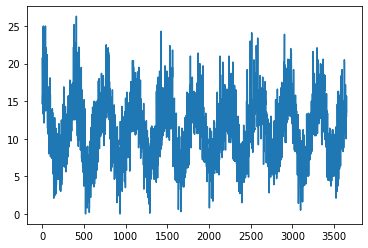

In [5]:
plt.plot(temp.Temp)

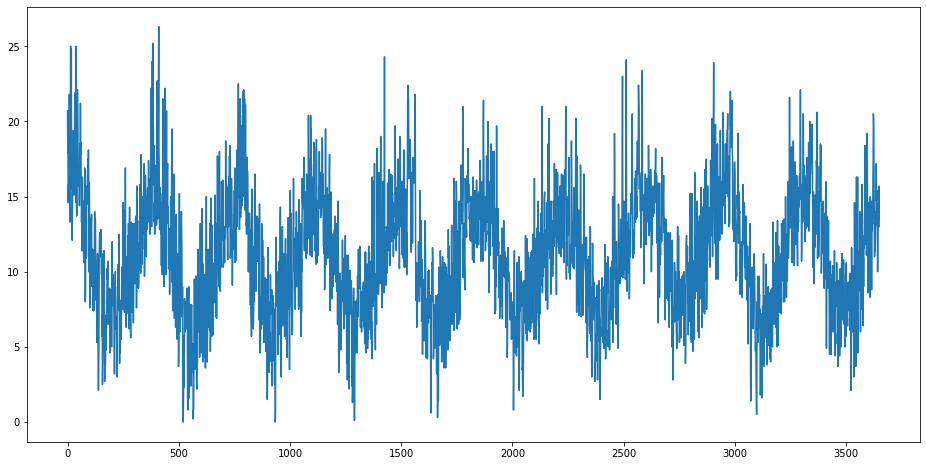

In [7]:
plt.figure(figsize=(16,8))
plt.plot(temp.Temp)
plt.show()

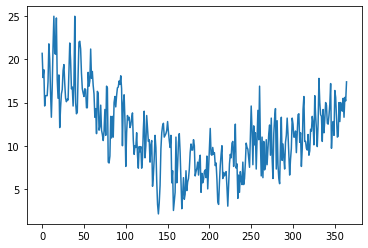

In [10]:
plt.plot(temp.Temp[0:365])
plt.show()

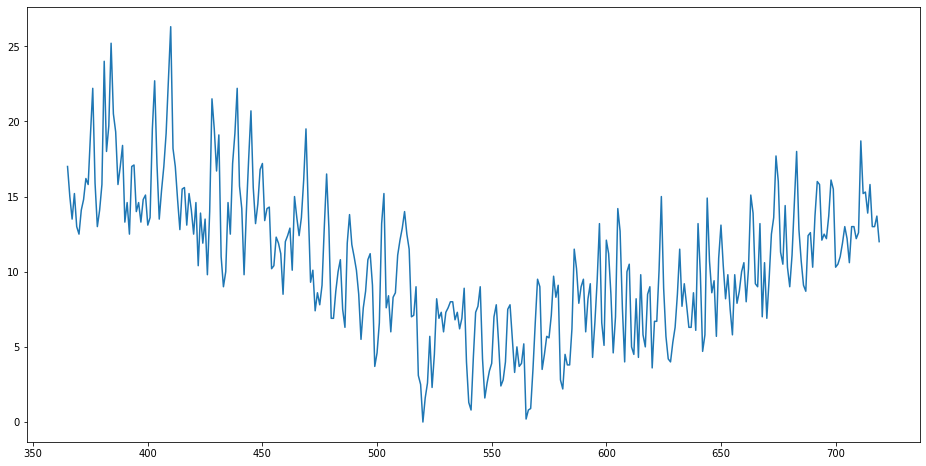

In [12]:
plt.figure(figsize=(16,8))
plt.plot(temp.Temp[365:720])
plt.show()

In [13]:
temp=temp[:365]

In [15]:
temp.shape

(365, 2)

In [16]:
val = pd.DataFrame(temp.Temp)
df = pd.concat([val.shift(1),val],axis=1)
df.columns = ['t-1','t']
df.head()

,t-1,t
0,NaN,20.7
1,20.7,17.9
2,17.9,18.8
3,18.8,14.6
4,14.6,15.8


In [17]:
result = df.corr()
result

,t-1,t
t-1,1.000000,0.801112
t,0.801112,1.000000


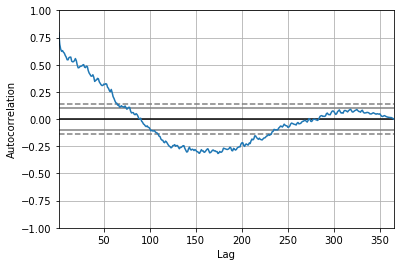

In [18]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(temp.Temp)

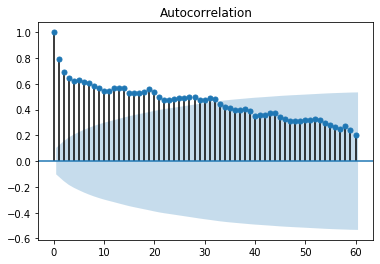

In [19]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(temp.Temp, lags = 60)
plt.show()

In [8]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [21]:
# split the data
X = temp.Temp
train = X[:350]
test = X[350:]

In [23]:
# train autoregression
model = AR(train).fit()
print("lags : ",model.k_ar)
print("coeff: ",model.params)

lags :  16
coeff:  const       0.871266
L1.Temp     0.547066
L2.Temp    -0.005307
L3.Temp     0.094762
L4.Temp    -0.017243
L5.Temp     0.093685
L6.Temp    -0.012677
L7.Temp     0.043557
L8.Temp    -0.013476
L9.Temp     0.061539
L10.Temp   -0.047309
L11.Temp    0.017551
L12.Temp    0.036503
L13.Temp    0.028404
L14.Temp    0.087640
L15.Temp   -0.064850
L16.Temp    0.065050
dtype: float64


In [38]:
len(train)


365

In [26]:
predictions = model.predict(start=349, end = 363)

In [27]:
predictions

349    12.204363
350    12.332813
351    11.834391
352    12.421466
353    12.404480
354    12.354170
355    11.962431
356    12.324874
357    12.532935
358    12.310091
359    12.479318
360    11.794833
361    12.325626
362    12.014201
363    11.763279
dtype: float64

In [28]:
test

350    16.4
351    15.6
352    13.3
353    11.0
354    11.1
355    15.0
356    12.8
357    15.0
358    14.2
359    14.0
360    15.5
361    13.3
362    15.6
363    15.2
364    17.4
Name: Temp, dtype: float64

In [29]:
error = mean_squared_error(test,predictions)
error

7.911651010800801

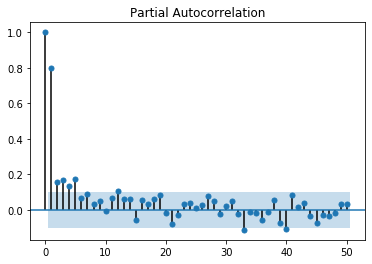

In [30]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(temp.Temp, lags = 50)
plt.show()

In [41]:
Y = temp.Temp
train1 = Y[:3285]
test1 = Y[3285:]

In [42]:
model1 = AR(train1).fit()
print("lags : ",model1.k_ar)
print("coeff: ",model1.params)

lags :  29
coeff:  const       0.565560
L1.Temp     0.585706
L2.Temp    -0.087613
L3.Temp     0.053356
L4.Temp     0.033647
L5.Temp     0.039932
L6.Temp     0.026656
L7.Temp     0.044164
L8.Temp     0.016495
L9.Temp     0.031656
L10.Temp    0.001715
L11.Temp    0.006758
L12.Temp    0.015580
L13.Temp    0.022453
L14.Temp    0.003875
L15.Temp    0.019686
L16.Temp    0.011152
L17.Temp    0.008038
L18.Temp    0.043903
L19.Temp   -0.006153
L20.Temp    0.025477
L21.Temp    0.007921
L22.Temp    0.011755
L23.Temp   -0.021991
L24.Temp    0.004741
L25.Temp    0.016310
L26.Temp    0.025204
L27.Temp    0.005912
L28.Temp    0.011341
L29.Temp   -0.009433
dtype: float64


In [43]:
len(train1)

3285

In [55]:
predictions = model1.predict(start=3284, end = 3648)

In [56]:
predictions

3284    14.093746
3285    12.746935
3286    12.959584
3287    13.073377
3288    13.025790
          ...    
3644    11.019754
3645    11.018943
3646    11.018138
3647    11.017341
3648    11.016550
Length: 365, dtype: float64

In [57]:
error1 = mean_squared_error(test1,predictions)
error1

13.193293756356411

In [14]:
Z = temp.Temp
train2 = Z[:3635]
test2 = Z[3635:]

In [15]:
model2 = AR(train2).fit()
print('lags : ', model2.k_ar)
print('coeff : ',model2.params)

lags :  29
coeff :  const       0.558058
L1.Temp     0.588940
L2.Temp    -0.091296
L3.Temp     0.048179
L4.Temp     0.040474
L5.Temp     0.039379
L6.Temp     0.026292
L7.Temp     0.045144
L8.Temp     0.012884
L9.Temp     0.037296
L10.Temp   -0.000624
L11.Temp    0.003269
L12.Temp    0.018491
L13.Temp    0.025454
L14.Temp    0.000461
L15.Temp    0.024276
L16.Temp    0.007802
L17.Temp    0.010290
L18.Temp    0.035369
L19.Temp   -0.008856
L20.Temp    0.023913
L21.Temp    0.020027
L22.Temp    0.010963
L23.Temp   -0.017555
L24.Temp   -0.002581
L25.Temp    0.017092
L26.Temp    0.020885
L27.Temp    0.007321
L28.Temp    0.008029
L29.Temp   -0.002025
dtype: float64


C:\Users\Mickey\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


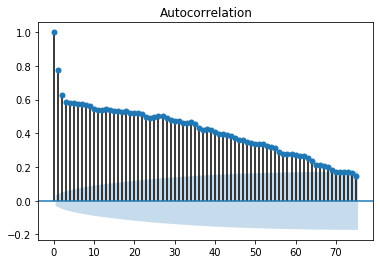

In [13]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(temp.Temp, lags = 75)
plt.show()

In [19]:
pred2 = model2.predict(start=3634, end = 3648)

In [20]:
error2 = mean_squared_error(test2,pred2)
error2

2.763491441465669